In [12]:
%matplotlib widget

import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import cv2

import vis_utils
import matrix_utils
import dist_utils

from GetLandmarks import GetLandmarks

#import plotly.graph_objects as go

In [13]:
IMAGE = 'test12.png'
#IMAGE = 'test13.jpg'

patient_img = cv2.imread('./test_img/' + IMAGE)

model_to_use = 'MEE' #'MEE' or 'iBUG'

In [14]:
patient_landmarks = GetLandmarks(patient_img, model_to_use)

Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!


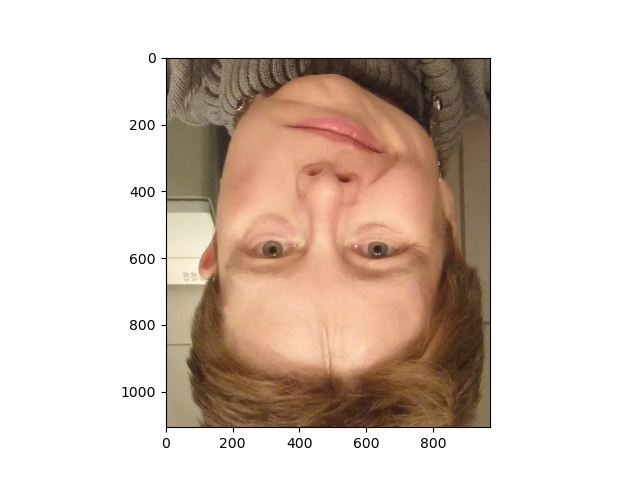

In [15]:
plt.figure()
plt.imshow(np.flip(patient_img))
plt.show()

In [16]:
landmarks_mee = GetLandmarks(patient_img, 'MEE')
landmarks_ibug = GetLandmarks(patient_img, 'iBUG')

new_shape_MEE = np.transpose(landmarks_mee._shape)
new_shape_iBUG = np.transpose(landmarks_ibug._shape)

Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
Successfully predicted landmarks!


In [17]:
bbox = landmarks_mee._boundingbox

bbox_x = [bbox[0], bbox[2]]
bbox_y = [bbox[1], bbox[3]]
bbox

[184, 325, 812, 953]

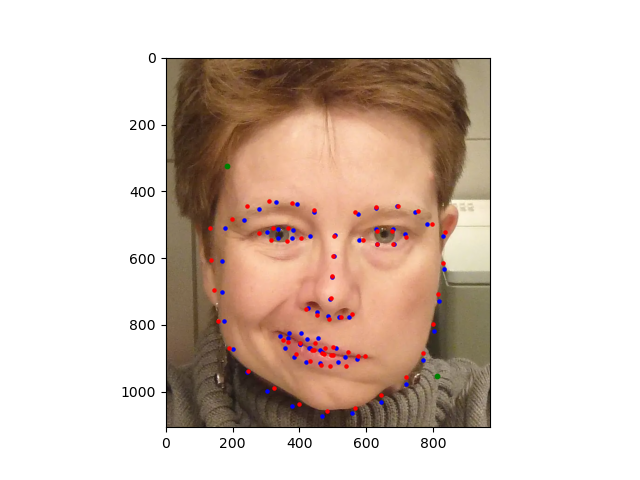

In [18]:
plt.clf()

img = plt.imread('./test_img/' + IMAGE)
implot = plt.imshow(img)

plt.scatter(x=new_shape_MEE[0], y=new_shape_MEE[1], c='b', s=5)
plt.scatter(x=new_shape_iBUG[0], y=new_shape_iBUG[1], c='r', s=5)

plt.scatter(x=bbox_x, y=bbox_y, c='g', s=10)

plt.show()

In [19]:
# Use Gemma's 51 key points model instead
gemma_shape = np.zeros((51,2),dtype=int)
gemma_shape[0] = landmarks_mee._shape[17]
gemma_shape[1] = landmarks_mee._shape[18]
gemma_shape[2] = landmarks_mee._shape[19]
gemma_shape[3] = landmarks_mee._shape[20]
gemma_shape[4] = landmarks_mee._shape[21]
gemma_shape[5] = landmarks_mee._shape[22]
gemma_shape[6] = landmarks_mee._shape[23]
gemma_shape[7] = landmarks_mee._shape[24]
gemma_shape[8] = landmarks_mee._shape[25]
gemma_shape[9] = landmarks_mee._shape[26]
gemma_shape[10] = landmarks_mee._shape[36]
gemma_shape[11] = landmarks_mee._shape[37]
gemma_shape[12] = landmarks_mee._shape[38]
gemma_shape[13] = landmarks_mee._shape[39]
gemma_shape[14] = landmarks_mee._shape[40]
gemma_shape[15] = landmarks_mee._shape[41]
gemma_shape[16] = landmarks_mee._shape[42]
gemma_shape[17] = landmarks_mee._shape[43]
gemma_shape[18] = landmarks_mee._shape[44]
gemma_shape[19] = landmarks_mee._shape[45]
gemma_shape[20] = landmarks_mee._shape[46]
gemma_shape[21] = landmarks_mee._shape[47]
gemma_shape[22] = landmarks_mee._shape[30]
gemma_shape[23] = landmarks_mee._shape[31]
gemma_shape[24] = landmarks_mee._shape[32]
gemma_shape[25] = landmarks_mee._shape[33]
gemma_shape[26] = landmarks_mee._shape[34]
gemma_shape[27] = landmarks_mee._shape[35]
gemma_shape[28] = landmarks_mee._shape[48]
gemma_shape[29] = landmarks_mee._shape[49]
gemma_shape[30] = landmarks_mee._shape[50]
gemma_shape[31] = landmarks_mee._shape[51]
gemma_shape[32] = landmarks_mee._shape[52]
gemma_shape[33] = landmarks_mee._shape[53]
gemma_shape[34] = landmarks_mee._shape[54]
gemma_shape[35] = landmarks_mee._shape[55]
gemma_shape[36] = landmarks_mee._shape[56]
gemma_shape[37] = landmarks_mee._shape[57]
gemma_shape[38] = landmarks_mee._shape[58]
gemma_shape[39] = landmarks_mee._shape[59]
gemma_shape[40] = landmarks_mee._shape[60]
gemma_shape[41] = landmarks_mee._shape[61]
gemma_shape[42] = landmarks_mee._shape[62]
gemma_shape[43] = landmarks_mee._shape[63]
gemma_shape[44] = landmarks_mee._shape[64]
gemma_shape[45] = landmarks_mee._shape[65]
gemma_shape[46] = landmarks_mee._shape[66]
gemma_shape[47] = landmarks_mee._shape[67]
gemma_shape[48] = landmarks_mee._shape[0]
gemma_shape[49] = landmarks_mee._shape[16]
gemma_shape[50] = landmarks_mee._shape[8]

In [20]:
gemma_shape.shape, gemma_shape.dtype

((51, 2), dtype('int64'))

In [21]:
# use point 48 as the origin and find angle between it and 49
# here it is first in radians
dy = gemma_shape[49][1]-gemma_shape[48][1]
dx = gemma_shape[49][0]-gemma_shape[48][0]
rot_angle = math.atan2(dy, dx)
rot_angle = math.degrees(rot_angle)  # in degrees

# find 2d rot matrix
rot_mat = cv2.getRotationMatrix2D(center=(gemma_shape[48][0],gemma_shape[48][1]),
                                          angle=rot_angle, scale=1)

TypeError: Can't parse 'center'. Sequence item with index 0 has a wrong type

In [ ]:
(gemma_shape[48][0],gemma_shape[48][1])

In [ ]:
gemma_shape_pad = np.pad(np.transpose(gemma_shape), 
                         ((0,1),(0,0)), 
                         'constant', 
                         constant_values=(0,1))
gemma_shape_pad

In [ ]:
gemma_shape[:5]

In [ ]:
gemma_shape_rotated = np.uint64(np.transpose(np.matmul(rot_mat, gemma_shape_pad)))
gemma_shape_rotated[:5]

In [ ]:
#patient_img

In [ ]:
h, w = patient_img.shape[:2]

In [ ]:
# rotate our image by 45 degrees around the center of the image
patient_img_rotated = cv2.warpAffine(patient_img, rot_mat, (w, h))
#cv2.imshow('img',patient_img_rotated)
#patient_img_rotated = plt.imread(cv2_to_plt(patient_img_rotated))
#plt.show()

In [ ]:
plt.figure()
plt.imshow(np.flip(patient_img_rotated,axis=2))


In [ ]:

def dist(arr, pointA, pointB):
    return dist_point(arr[pointA], arr[pointB])

def dist_point(pointA, pointB):
    return np.sqrt((pointA[0]-pointB[0])**2
                   + (pointA[1]-pointB[1])**2)

def height(arr, pointA, pointB):
    return np.abs(arr[pointA][1]-arr[pointB][1])

def width(arr, pointA, pointB):
    return np.abs(arr[pointA][0]-arr[pointB][0])

In [ ]:
distA = width(gemma_shape, 48, 49)
distBl = width(gemma_shape, 10, 13)
distBr = width(gemma_shape, 16, 19)
distC = dist(gemma_shape, 37, 50) # OR gemma_shape[50][1]-gemma_shape[37][1]
distD = width(gemma_shape, 10, 48)
distE = width(gemma_shape, 19, 49)
distF = dist(gemma_shape, 10, 37)
distG = dist(gemma_shape, 19, 37)
distH = dist(gemma_shape, 10, 23)
distI = dist(gemma_shape, 19, 27)
distJ = dist(gemma_shape, 23, 37)
distK = dist(gemma_shape, 27, 37)

In [ ]:
distL = np.average(gemma_shape[0:5][...,1])
distM = np.average(gemma_shape[5:10][...,1])
distNl = height(gemma_shape, 11, 15)
distNr = height(gemma_shape, 12, 14)
distOl = height(gemma_shape, 17, 21)
distOr = height(gemma_shape, 18, 20)
distN = np.average((distNl, distNr))
distO = np.average((distOl, distOr))
distPl = height(gemma_shape, 29, 39)
distPu = height(gemma_shape, 30, 38)
distQl = height(gemma_shape, 32, 36)
distQu = height(gemma_shape, 33, 35)

In [ ]:
distR = dist(gemma_shape, 3, 37)
distS = dist(gemma_shape, 6, 37)
distT = dist(gemma_shape, 2, 37)
distU = dist(gemma_shape, 7, 37)
distVl = dist(gemma_shape, 28, 37)
distVr = dist(gemma_shape, 34, 37)
distW = width(gemma_shape, 28, 34)
distX = dist(gemma_shape, 25, 31)

In [ ]:
distA

# TODO: find scale from emotrics, put unit into millimeteres instead of pixels


In [ ]:
def angle(arr, pointA, pointB):
    dy = arr[pointB][1]-arr[pointA][1]
    dx = arr[pointB][0]-arr[pointA][0]
    return np.abs(math.degrees(math.atan2(dy, dx)))

def slope(arr, pointA, pointB):
    dy = arr[pointB][1]-arr[pointA][1]
    dx = arr[pointB][0]-arr[pointA][0]
    return np.abs(dy/dx)

def find_max(A,B):
    return np.max((A/B , B/A))

def next_dist(pointA):
    return dist()

def close_seg(arr, points):
    sum_dist = 0
    for i in points:
        sum_dist += dist(arr, i, i+1)
    sum_dist -= dist(arr, points[-1], points[-1]+1)
    sum_dist += dist(arr, points[0], points[-1])
    return sum_dist

In [ ]:
distWl = close_seg(gemma_shape, [28,29,30,31,37,38,39])
distWr = close_seg(gemma_shape, [31,32,33,34,35,36,37])

In [ ]:
f0 = math.degrees(math.atan2(gemma_shape[9][1]-gemma_shape[0][1], 
                             gemma_shape[9][0]-gemma_shape[0][0]))
f1 = math.degrees(math.atan2(gemma_shape[7][1]-gemma_shape[2][1], 
                             gemma_shape[7][0]-gemma_shape[2][0]))
f2 = math.degrees(math.atan2(gemma_shape[5][1]-gemma_shape[4][1], 
                             gemma_shape[5][0]-gemma_shape[4][0]))

In [ ]:
# Eyebrows
f0 = angle(gemma_shape, 0, 9)
f1 = angle(gemma_shape, 2, 7)
f2 = angle(gemma_shape, 4, 5)
f3 = find_max(distL, distM)

f4 = slope(gemma_shape, 0, 9)
f5 = slope(gemma_shape, 2, 7)
f6 = slope(gemma_shape, 4, 5)

# Eyes
f7 = angle(gemma_shape, 10, 19)
f8 = find_max(distBl, distBr)
f9 = find_max(distD, distE)
f10 = find_max(distH, distI)
f11 = find_max(distN, distO)
f12 = find_max(distNl, distOr)
f13 = find_max(distNr, distOl)

# Mouth
f14 = angle(gemma_shape, 28, 34)
f15 = find_max(distF, distG)
f16 = find_max(distPl, distQl)
f17 = find_max(distPu, distQu)
f18 = np.max((distVl/distA , distVr/distA))
f19 = np.max((distPl/distW , distQl/distW))
f20 = np.max((distPu/distW , distQu/distW))
f21 = np.max((distWl/distW , distWr/distW))

# Nose 
f22 = angle(gemma_shape, 23, 27)

# Combined
f23 = angle(gemma_shape, 22, 37)
f24 = find_max(distJ, distK)
f25 = np.max((distT/distA , distU/distA))
f26 = np.max((distR/distA , distS/distA))
f27 = distC / distA
f28 = distX / distA

In [ ]:
# TODO: look at uncertainties, if we rotate image by 1degree or if the exposure or lighting changes,
# how are the distances changing? does it lower the model's performance?

In [ ]:
import cv2
import numpy as np

# Create a zeros image
img = np.zeros((400,400), dtype=np.uint8)

# Specify the text location and rotation angle
text_location = (100,200)
angle = 30

# Draw the text using cv2.putText()
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'TheAILearner', text_location, font, 1, 255, 2)

# Rotate the image using cv2.warpAffine()
M = cv2.getRotationMatrix2D(text_location, angle, 1)

In [ ]:
(gemma_shape[48][0],gemma_shape[48][1]),rot_angle

In [ ]:
rot_mat = cv2.getRotationMatrix2D(center=(gemma_shape[48][0],gemma_shape[48][1]),
                                          angle=rot_angle, scale=1)
rot_mat

In [ ]:
M

In [ ]:
M.shape

In [ ]:
rot_mat, rot_mat.shape

In [ ]:
img.shape

In [ ]:
img.min(), img.max(), img.dtype

In [ ]:
np.unique(img)

In [ ]:
plt.figure()
plt.imshow(img)


In [ ]:
out = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
out
# Display the results
#cv2.imshow('img',out)
#cv2.waitKey(0)

In [ ]:
out.shape, out.min(), out.max(), out.dtype

In [ ]:
np.unique(out)

In [ ]:
plt.figure()
plt.imshow(out)

In [ ]:
patient_img.shape, patient_img.min(), patient_img.max(), patient_img.dtype

In [ ]:
type(patient_img)

In [ ]:
plt.figure()
plt.imshow(np.flip(patient_img, axis=2))


In [ ]:
rotated = cv2.warpAffine(patient_img, M, (patient_img.shape[1], patient_img.shape[0]))


In [ ]:
rotated.shape, rotated.min(), rotated.max(), rotated.dtype

In [ ]:
plt.figure()
plt.imshow(np.flip(rotated, axis=2))

In [ ]:
(gemma_shape[48][0],gemma_shape[48][1]),rot_angle

In [ ]:
#m2 = cv2.getRotationMatrix2D(center=(0.5*patient_img.shape[1], 0.5*patient_img.shape[0]), angle=1.9, scale=1)
m2 = cv2.getRotationMatrix2D(center=(177, 511), angle=1.9296, scale=1)


In [ ]:
m2

In [ ]:
rotated = cv2.warpAffine(patient_img, m2, (patient_img.shape[1], patient_img.shape[0]))


In [ ]:
rotated.shape, rotated.min(), rotated.max(), rotated.dtype

In [ ]:
plt.figure()
plt.imshow(np.flip(rotated, axis=2))